In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tfdot import tfdot

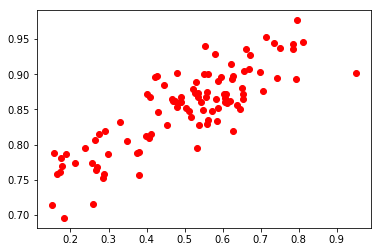

In [2]:
#X
train_x = np.random.normal(0.5, 0.2, 100)  #產生100個平均=0.5, 標準差=0.2的成績
#Y
a = 0.3
b = 0.7
train_y = a*train_x+b+np.random.normal(0.0,0.03,100)
plt.plot(train_x,train_y,'ro', label='inputdata')
plt.show()

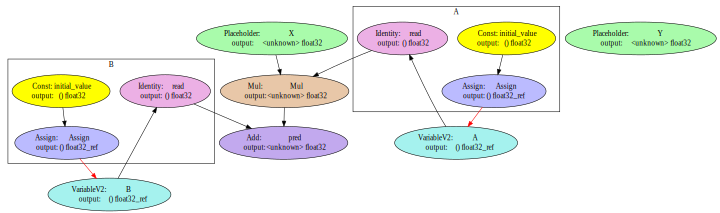

In [3]:
tf.reset_default_graph()
# Training Data
X = tf.placeholder('float', name="X")
Y = tf.placeholder('float', name="Y")
#權重
A = tf.Variable(np.random.randn(), name='A')

#Bias
B = tf.Variable(np.random.randn(), name='B') 

#計算出來的Y
pred = tf.add(tf.multiply(X, A),B, name='pred')


tfdot()

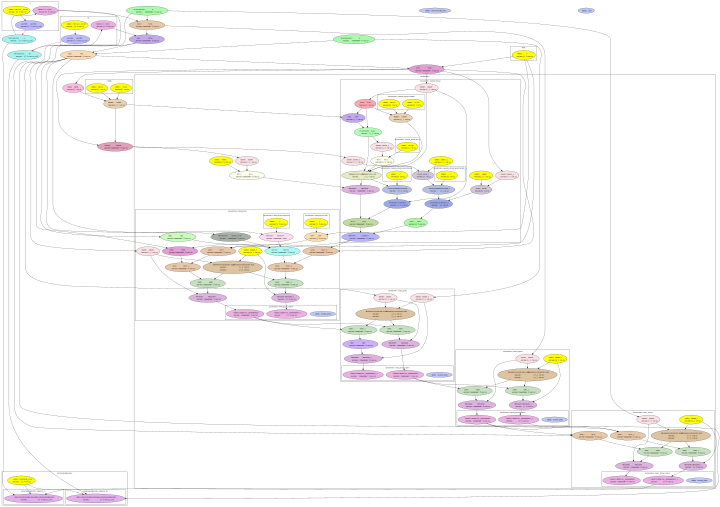

In [4]:
cost_function = tf.reduce_mean(tf.pow(pred-Y, 2))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost_function)
init = tf.global_variables_initializer()
tfdot()

In [5]:
cost_function

<tf.Tensor 'Mean:0' shape=<unknown> dtype=float32>

In [6]:
len(train_x[[1,2]])

2

In [7]:
sess = tf.InteractiveSession()
sess.run(init)
for epoh in range(1000):
    #rnd_idx = np.random.choice(train_x.shape[0], 50, replace=False)
    sess.run(train_step, feed_dict={X: train_x[:], Y: train_y[:]})
    if (epoh) % 20 == 0:
        c = sess.run(cost_function, feed_dict={X: train_x, Y:train_y})
        print ("Epoch:", epoh, "A=", sess.run(A), "B=", sess.run(B),"cost=", "{:.9f}".format(c), )

Epoch: 0 A= 1.04398 B= 0.867634 cost= 0.310111731
Epoch: 20 A= 0.949583 B= 0.697008 cost= 0.118348330
Epoch: 40 A= 0.890781 B= 0.595556 cost= 0.049005412
Epoch: 60 A= 0.853391 B= 0.535656 cost= 0.023861410
Epoch: 80 A= 0.828885 B= 0.500713 cost= 0.014676438
Epoch: 100 A= 0.81214 B= 0.480755 cost= 0.011255108
Epoch: 120 A= 0.800079 B= 0.46979 cost= 0.009916649
Epoch: 140 A= 0.790851 B= 0.46422 cost= 0.009332154
Epoch: 160 A= 0.783345 B= 0.461881 cost= 0.009021828
Epoch: 180 A= 0.776893 B= 0.461473 cost= 0.008812396
Epoch: 200 A= 0.771093 B= 0.462216 cost= 0.008641284
Epoch: 220 A= 0.765703 B= 0.463641 cost= 0.008485856
Epoch: 240 A= 0.760578 B= 0.465466 cost= 0.008337901
Epoch: 260 A= 0.755631 B= 0.467522 cost= 0.008194430
Epoch: 280 A= 0.750809 B= 0.469707 cost= 0.008054322
Epoch: 300 A= 0.746081 B= 0.471961 cost= 0.007917140
Epoch: 320 A= 0.741426 B= 0.474247 cost= 0.007782691
Epoch: 340 A= 0.736832 B= 0.476543 cost= 0.007650876
Epoch: 360 A= 0.732294 B= 0.478837 cost= 0.007521625
Epo

In [8]:
print('A:',sess.run(A))
print('B:',sess.run(B))

A: 0.60878
B: 0.542229


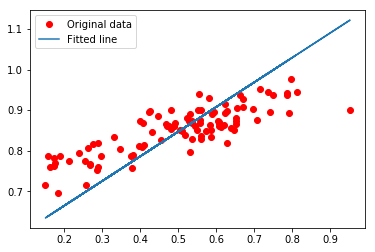

In [9]:
plt.plot(train_x, train_y, 'ro', label='Original data')
plt.plot(train_x, sess.run(A) * train_x + sess.run(B), label='Fitted line')
plt.legend()
plt.show()